In [52]:
import pandas as pd
import numpy as np

# File paths
file_paths = [
    "C:\\Users\\Admin\\Desktop\\IBM Project\\Literacy rate 2020.xlsx",
    "C:\\Users\\Admin\\Desktop\\IBM Project\\Literacy rate 2021.xlsx",
    "C:\\Users\\Admin\\Desktop\\IBM Project\\Literacy rate 2022.xlsx",
    "C:\\Users\\Admin\\Desktop\\IBM Project\\Literacy rate 2023.xlsx",
    "C:\\Users\\Admin\\Desktop\\IBM Project\\Literacy rate 2024.xlsx"
]

In [53]:
# Load data from Excel files
data_frames = []
for file in file_paths:
    df = pd.read_excel(file)
    data_frames.append(df)

In [54]:
# Combine data into a single DataFrame
combined_data = pd.concat(data_frames, keys=[2020, 2021, 2022, 2023, 2024], names=['Year', 'Row'])

In [55]:
# Reset index to have 'Year' as a column
combined_data.reset_index(level='Row', drop=True, inplace=True)
combined_data.reset_index(inplace=True)

In [56]:
# Display the first few rows of the combined data
print(combined_data.head())

   Year                   State/UT  Male Literacy Rate %  \
0  2020  Andaman & Nicobar Islands                  91.0   
1  2020             Andhra Pradesh                  72.5   
2  2020          Arunachal Pradesh                  71.7   
3  2020                      Assam                  88.9   
4  2020                      Bihar                  78.9   

   Female Literacy Rate %  Average Literacy Rate %  
0                    80.7                     85.8  
1                    58.8                     65.3  
2                    57.4                     64.7  
3                    79.3                     84.3  
4                    60.0                     69.6  


In [57]:
# Data Cleaning and Preprocessing
# Check for missing values
missing_values = combined_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Year                       0
State/UT                   0
Male Literacy Rate %       0
Female Literacy Rate %     0
Average Literacy Rate %    0
dtype: int64


In [58]:
# Handle missing values
# Fill missing values only for numeric columns
numeric_cols = combined_data.select_dtypes(include=[np.number]).columns
combined_data[numeric_cols] = combined_data[numeric_cols].fillna(combined_data[numeric_cols].mean())

In [59]:
# Check for outliers and inconsistencies
for column in ['Male Literacy Rate %', 'Female Literacy Rate %', 'Average Literacy Rate %']:
    combined_data = combined_data[(combined_data[column] >= 0) & (combined_data[column] <= 100)]

In [60]:
# Display cleaned data
print(combined_data.head())

   Year                   State/UT  Male Literacy Rate %  \
0  2020  Andaman & Nicobar Islands                  91.0   
1  2020             Andhra Pradesh                  72.5   
2  2020          Arunachal Pradesh                  71.7   
3  2020                      Assam                  88.9   
4  2020                      Bihar                  78.9   

   Female Literacy Rate %  Average Literacy Rate %  
0                    80.7                     85.8  
1                    58.8                     65.3  
2                    57.4                     64.7  
3                    79.3                     84.3  
4                    60.0                     69.6  


In [61]:
# Exploratory Data Analysis (EDA)

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

# Descriptive statistical analysis
print(combined_data.describe())

              Year  Male Literacy Rate %  Female Literacy Rate %  \
count   180.000000            180.000000              180.000000   
mean   2022.000000             86.591111               73.987778   
std       1.418158              6.351855                9.842898   
min    2020.000000             71.700000               52.200000   
25%    2021.000000             81.950000               65.975000   
50%    2022.000000             86.500000               74.900000   
75%    2023.000000             92.125000               81.900000   
max    2024.000000             97.800000               95.700000   

       Average Literacy Rate %  
count               180.000000  
mean                 80.352222  
std                   7.852897  
min                  64.500000  
25%                  74.525000  
50%                  80.100000  
75%                  87.000000  
max                  96.700000  


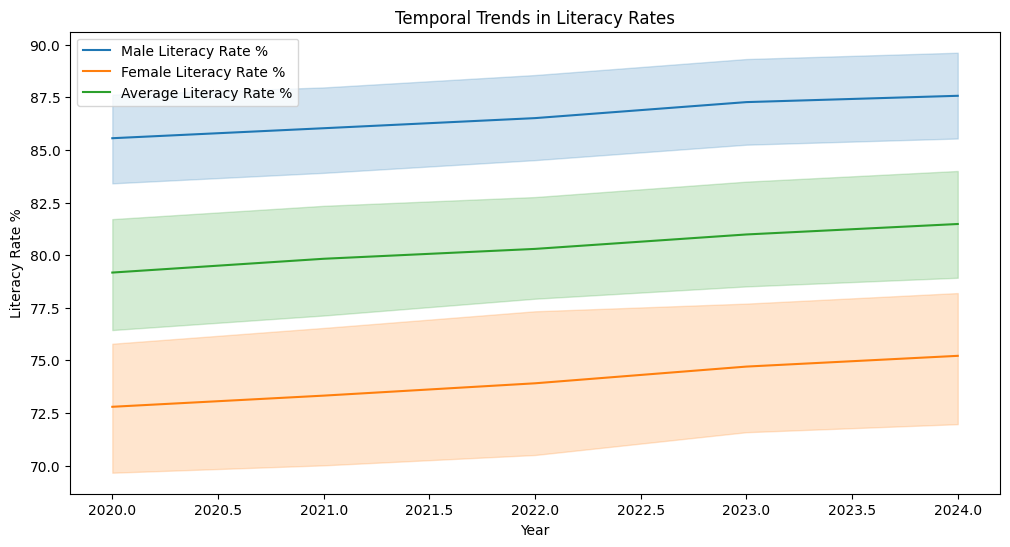

In [63]:
# Visualize temporal trends (yearly) in literacy rates
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='Year', y='Male Literacy Rate %', label='Male Literacy Rate %')
sns.lineplot(data=combined_data, x='Year', y='Female Literacy Rate %', label='Female Literacy Rate %')
sns.lineplot(data=combined_data, x='Year', y='Average Literacy Rate %', label='Average Literacy Rate %')
plt.title('Temporal Trends in Literacy Rates')
plt.xlabel('Year')
plt.ylabel('Literacy Rate %')
plt.legend()
plt.show()

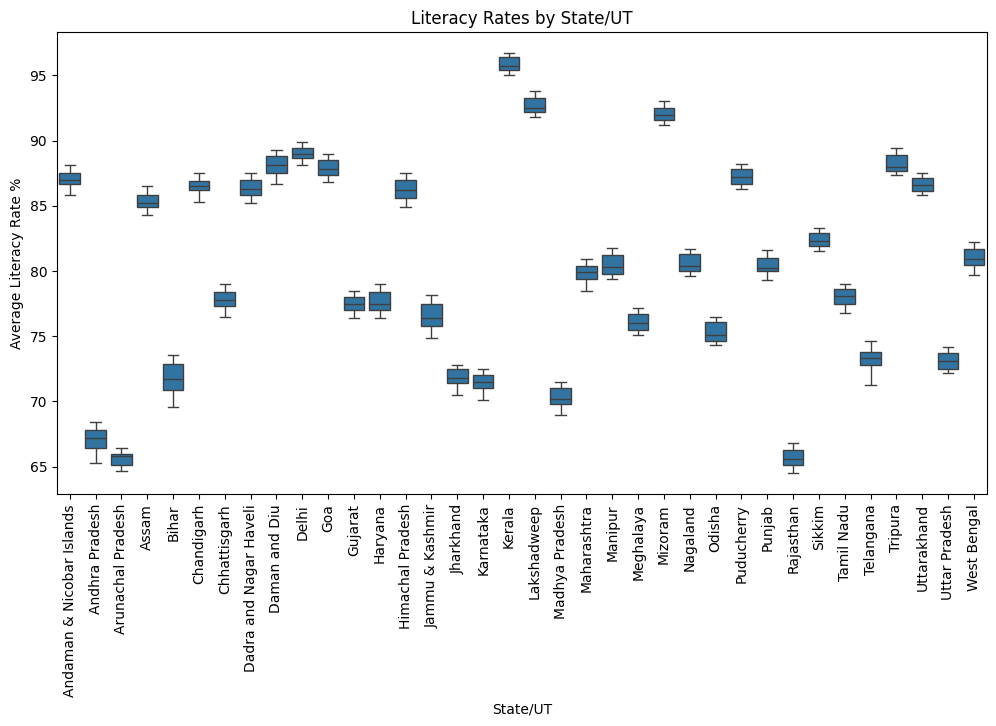

In [64]:
# Visualize spatial distributions (literacy rates by state/UT)
plt.figure(figsize=(12, 6))
sns.boxplot(x='State/UT', y='Average Literacy Rate %', data=combined_data)
plt.title('Literacy Rates by State/UT')
plt.xticks(rotation=90)
plt.show()

In [65]:
# Correlation Analysis

In [66]:
# Correlation matrix
correlation_matrix = combined_data[['Male Literacy Rate %', 'Female Literacy Rate %', 'Average Literacy Rate %']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                          Male Literacy Rate %  Female Literacy Rate %  \
Male Literacy Rate %                 1.000000                0.901110   
Female Literacy Rate %               0.901110                1.000000   
Average Literacy Rate %              0.964885                0.982379   

                         Average Literacy Rate %  
Male Literacy Rate %                    0.964885  
Female Literacy Rate %                  0.982379  
Average Literacy Rate %                 1.000000  


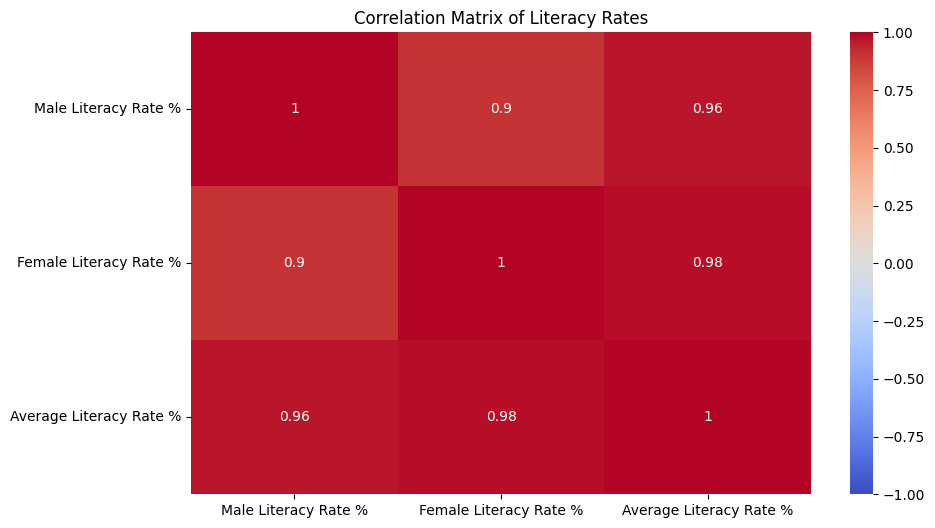

In [67]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Literacy Rates')
plt.show()

In [68]:
#Trend Analysis

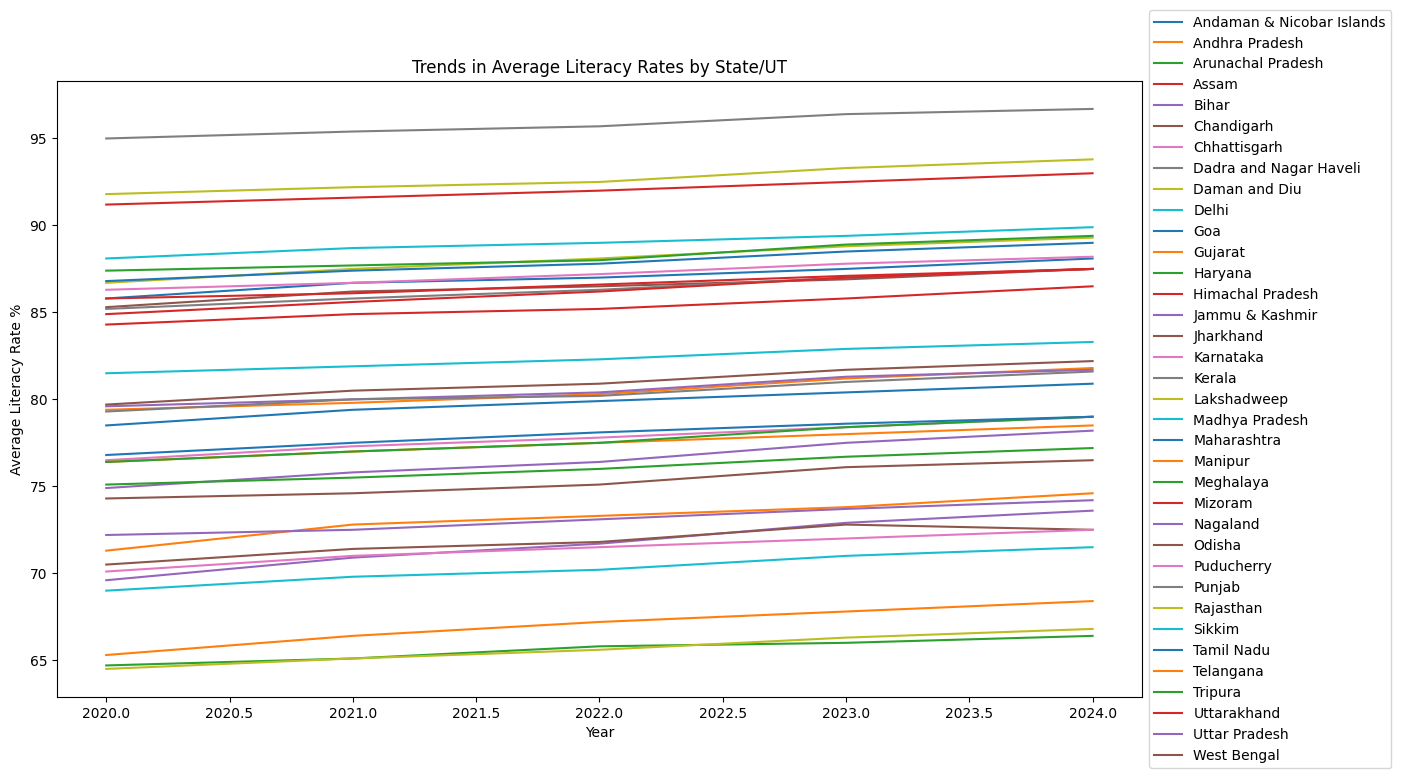

In [69]:
# Trends over the years for different states
plt.figure(figsize=(14, 8))
for state in combined_data['State/UT'].unique():
    state_data = combined_data[combined_data['State/UT'] == state]
    plt.plot(state_data['Year'], state_data['Average Literacy Rate %'], label=state)

plt.title('Trends in Average Literacy Rates by State/UT')
plt.xlabel('Year')
plt.ylabel('Average Literacy Rate %')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [70]:
#Geospatial Analysis

In [ ]:
#Predictive Modeling

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [82]:
# Prepare the data
X = combined_data[['Year', 'Male Literacy Rate %', 'Female Literacy Rate %']]
y = combined_data['Average Literacy Rate %']

In [83]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [85]:
# Make predictions
y_pred = model.predict(X_test)

In [86]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.08398999446319066
Mean Absolute Error: 0.18117201420480258
R-squared: 0.9986682341083445


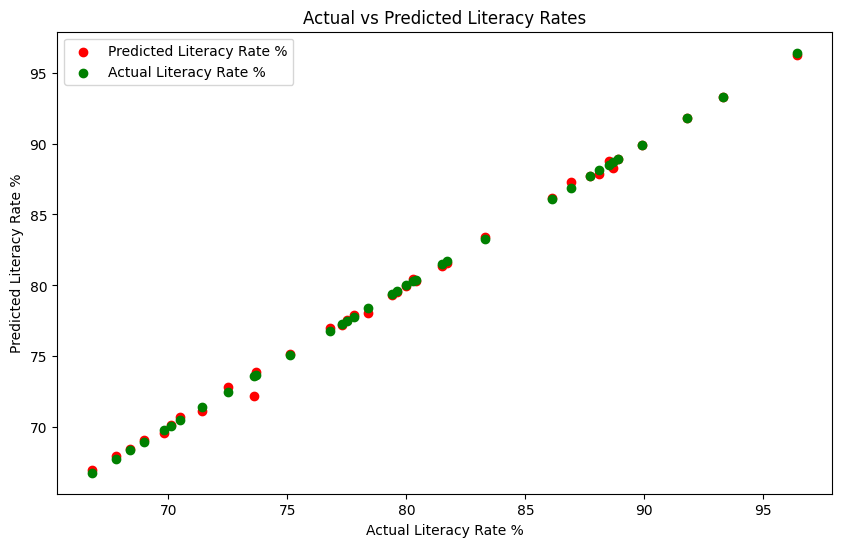

In [92]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', label='Predicted Literacy Rate %')
plt.scatter(y_test, y_test, color='green', label='Actual Literacy Rate %')
plt.xlabel('Actual Literacy Rate %')
plt.ylabel('Predicted Literacy Rate %')
plt.title('Actual vs Predicted Literacy Rates')
plt.legend()

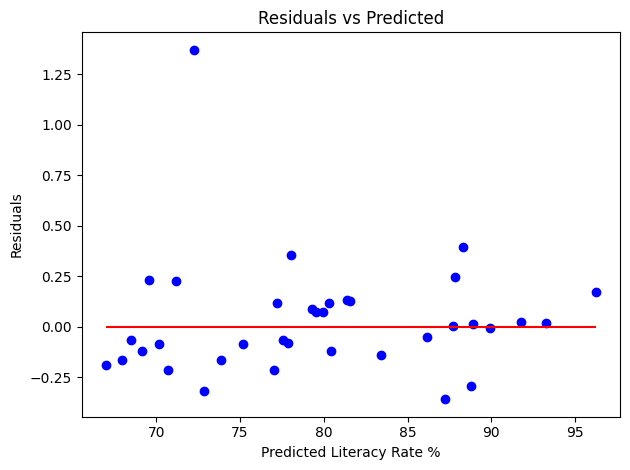

In [95]:
# Residual plot
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel('Predicted Literacy Rate %')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()